# EDA.ipynb Steps:

## 1.Load the dataset.
## 2.Explore the data structure, types, and summary statistics.
## 3.Visualize relationships between features and the target variable.
## 4.Identify missing values and outliers.

In [1]:
# importing library 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

In [3]:
# Set the path to the file you'd like to load
file_path = "../data/BostonHousing.csv"  # Make sure the file is actually a .csv
df = pd.read_csv(file_path)  # Use pd.read_csv() for CSV files
print(df.head())
df.to_pickle("eda_dataframe.pkl") 

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# 1️⃣ Basic Info

In [4]:

print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


# 2️⃣ Summary Statistics


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

# 3️⃣ Check for Missing Values


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


# 4️⃣ Distribution of Target Variable (MEDV)


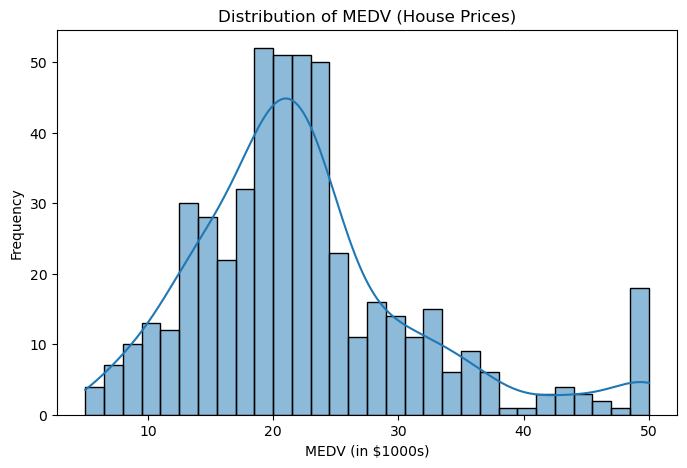

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["medv"], bins=30, kde=True)
plt.title("Distribution of MEDV (House Prices)")
plt.xlabel("MEDV (in $1000s)")
plt.ylabel("Frequency")
plt.show()


# 5️⃣ Correlation Heatmap


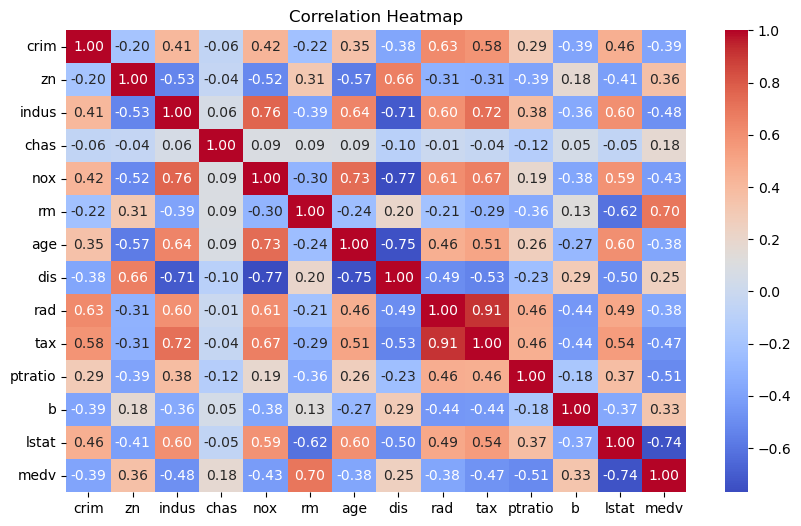

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6️⃣ Scatter Plots for Important Features

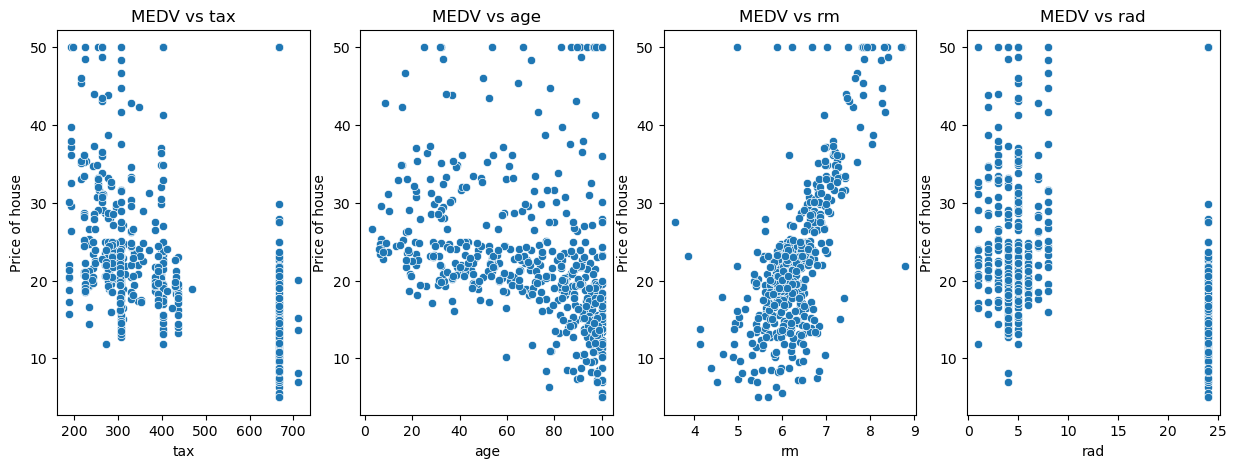

In [13]:

features = ["tax", "age", "rm" ,"rad"]
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(x=df[feature], y=df["medv"])
    plt.xlabel(feature)
    plt.ylabel("Price of house")
    plt.title(f"MEDV vs {feature}")
plt.show()